In [1]:
from utils.alad import ALAD
from utils.dataloader import Dataloader
import torch
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import numpy as np

# Train ALAD model on tabular dataset KDDCup99

In [3]:
# Define training parameters
batch_size = 50
dataset = 'KDDCup'
network_name = 'KDD'
max_epochs = 100

In [4]:
alad = ALAD(
    dataset,
    batch_size,
    network_name,
    device="cuda",
    optimizer=torch.optim.Adam,
    max_epochs=max_epochs,
    verbose=False,
    betas=(0.5, 0.999),
    report_interval=10,
    checkpoint_interval=500
)

Load tabular data KDDCup99...
Proportion of as anomalous defined samples in test set: 19.82% (In Total: 19583 of 98804 samples)


In [5]:
# Train model
alad.train()

----------------------------------------------------------------------------------------------------
----------------------------- Start training with dataset KDDCup99 -----------------------------
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████| 100/100 [2:13:02<00:00, 79.82s/it]


Number of anomalous samples: 19583


100%|█████████████████████████████████████| 1977/1977 [00:01<00:00, 1221.05it/s]


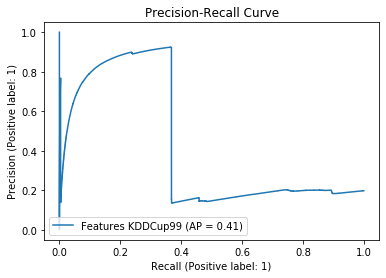

Precision: 0.8934 	 Recall: 0.6803 	 F1-Score: 0.7250


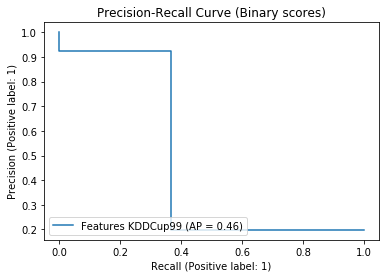

In [6]:
# Evaluate model
alad.evaluate()

# Train ALAD model on image dataset CIFAR-10

In [12]:
# Define training parameters
batch_size = 32
dataset = 'CIFAR10'
network_name = 'logo'
max_epochs = 100

In [13]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Load image data CIFAR-10 of class 0...
Files already downloaded and verified
After discarding anomalous classes (except normal class 0), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)


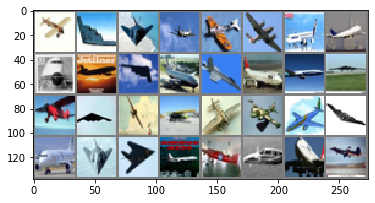

In [14]:
# Show dataset
train_loader, _, _, _ = Dataloader(dataset)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get first training batch
dataiter = iter(train_loader)
imgs, _ = dataiter.next()

imshow(make_grid(imgs))

In [15]:
alad = ALAD(
dataset,
batch_size,
network_name,
device="cuda",
optimizer=torch.optim.Adam,
max_epochs=max_epochs,
verbose=False,
betas=(0.5, 0.999),
report_interval=10,
checkpoint_interval=500)

Load image data CIFAR-10 of class 0...
Files already downloaded and verified
After discarding anomalous classes (except normal class 0), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 1...
Files already downloaded and verified
After discarding anomalous classes (except normal class 1), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 2...
Files already downloaded and verified
After discarding anomalous classes (except normal class 2), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 3..

In [6]:
# Train model
alad.train()

----------------------------------------------------------------------------------------------------
------------------------ Start training with class plane as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [39:50<00:00, 23.91s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class car as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [36:56<00:00, 22.16s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class bird as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [37:08<00:00, 22.28s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class cat as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [35:20<00:00, 21.21s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class deer as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [34:32<00:00, 20.73s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class dog as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [34:35<00:00, 20.76s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class frog as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [36:14<00:00, 21.75s/it]


In [16]:
# Evaluate model
alad.evaluate()

Start evaluation...
Number of anomalous samples: 9000


RuntimeError: Error(s) in loading state_dict for Decoder:
	Missing key(s) in state_dict: "conv1.1.weight", "conv1.1.bias", "conv1.1.running_mean", "conv1.1.running_var", "conv2.1.weight", "conv2.1.bias", "conv2.1.running_mean", "conv2.1.running_var", "conv3.1.weight", "conv3.1.bias", "conv3.1.running_mean", "conv3.1.running_var", "conv4.1.weight", "conv4.1.bias", "conv4.1.running_mean", "conv4.1.running_var". 
	Unexpected key(s) in state_dict: "conv1.2.weight", "conv1.2.bias", "conv1.2.running_mean", "conv1.2.running_var", "conv1.2.num_batches_tracked", "conv2.2.weight", "conv2.2.bias", "conv2.2.running_mean", "conv2.2.running_var", "conv2.2.num_batches_tracked", "conv3.2.weight", "conv3.2.bias", "conv3.2.running_mean", "conv3.2.running_var", "conv3.2.num_batches_tracked", "conv4.2.weight", "conv4.2.bias", "conv4.2.running_mean", "conv4.2.running_var", "conv4.2.num_batches_tracked". 

Load image data CIFAR-10 of class 5...
Files already downloaded and verified
After discarding anomalous classes (except normal class 5), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified


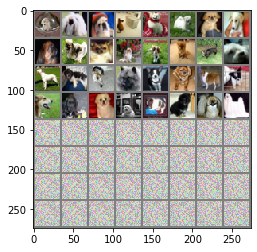

In [8]:
# Show reconstructions of class deer

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog') #, 'horse', 'ship', 'truck')

enc = alad.encoder
dec = alad.decoder

alad.load_networks("deer")

train_loader, _, _, _ = Dataloader(dataset, normal_class=5, batch_size=32)

# get first training batch
dataiter = iter(train_loader)
imgs, _ = dataiter.next()

rec = dec(enc(imgs.to("cuda"))).detach().cpu()

imgs = torch.cat((imgs, rec.sigmoid()), dim=0)

imshow(make_grid(imgs))
